In [1]:
# Import required libraries

import numpy as np
np.random.seed(2017)

import os
import time
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten

import pandas as pd
import cv2
from keras.models import load_model
import numpy as np

from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from numpy import genfromtxt


Using TensorFlow backend.


In [2]:
# Read the dataframe
trainLabelscsv = genfromtxt('C:/Users/Sarala/Desktop/MypartWithData/trainLables_V2.csv',dtype=str, delimiter=',')


# Source Directory
PATH='C:/Users/Sarala/Desktop/MypartWithData/Train'
files=os.listdir(PATH)
img_data_list=[]
labels=[]



# Find the extension of image data
y=trainLabelscsv.shape[0]
for i in files:
      print(i)
      try: 
       img_path = PATH+ '/'+ i 
       img = image.load_img(img_path, target_size=(224, 224))
       x = image.img_to_array(img)
       x = np.expand_dims(x, axis=0)
       x = preprocess_input(x)
       print('Input image shape:', x.shape)
       img_data_list.append(x)
       for j in range(0,y): # Make final dir to store classwise images
           if i==trainLabelscsv[j][0]+'.jpg':
                  print(trainLabelscsv[j][1])
                  labels.append(trainLabelscsv[j][1])
                  
      except:   
          pass   

img_data = np.array(img_data_list)
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)
num_of_samples = img_data.shape[0]


                  
                  
# define labels
num_classes=3
Y = np_utils.to_categorical(labels, num_classes)


x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset and define transforms for the training data and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)



N0_0.jpg
Input image shape: (1, 224, 224, 3)
0
N0_1.jpg
Input image shape: (1, 224, 224, 3)
0
N0_10.jpg
Input image shape: (1, 224, 224, 3)
0
N0_11.jpg
Input image shape: (1, 224, 224, 3)
0
N0_12.jpg
Input image shape: (1, 224, 224, 3)
0
N0_13.jpg
Input image shape: (1, 224, 224, 3)
0
N0_14.jpg
Input image shape: (1, 224, 224, 3)
0
N0_15.jpg
Input image shape: (1, 224, 224, 3)
0
N0_16.jpg
Input image shape: (1, 224, 224, 3)
0
N0_17.jpg
Input image shape: (1, 224, 224, 3)
0
N0_18.jpg
Input image shape: (1, 224, 224, 3)
0
N0_19.jpg
Input image shape: (1, 224, 224, 3)
0
N0_2.jpg
Input image shape: (1, 224, 224, 3)
0
N0_20.jpg
Input image shape: (1, 224, 224, 3)
0
N0_21.jpg
Input image shape: (1, 224, 224, 3)
0
N0_22.jpg
Input image shape: (1, 224, 224, 3)
0
N0_23.jpg
Input image shape: (1, 224, 224, 3)
0
N0_24.jpg
Input image shape: (1, 224, 224, 3)
0
N0_25.jpg
Input image shape: (1, 224, 224, 3)
0
N0_26.jpg
Input image shape: (1, 224, 224, 3)
0
N0_27.jpg
Input image shape: (1, 224, 224, 

Input image shape: (1, 224, 224, 3)
1
N1_436.jpg
Input image shape: (1, 224, 224, 3)
1
N1_437.jpg
Input image shape: (1, 224, 224, 3)
1
N1_438.jpg
Input image shape: (1, 224, 224, 3)
1
N1_439.jpg
Input image shape: (1, 224, 224, 3)
1
N1_44.jpg
Input image shape: (1, 224, 224, 3)
1
N1_440.jpg
Input image shape: (1, 224, 224, 3)
1
N1_441.jpg
Input image shape: (1, 224, 224, 3)
1
N1_442.jpg
Input image shape: (1, 224, 224, 3)
1
N1_443.jpg
Input image shape: (1, 224, 224, 3)
1
N1_444.jpg
Input image shape: (1, 224, 224, 3)
1
N1_445.jpg
Input image shape: (1, 224, 224, 3)
1
N1_446.jpg
Input image shape: (1, 224, 224, 3)
1
N1_447.jpg
Input image shape: (1, 224, 224, 3)
1
N1_448.jpg
Input image shape: (1, 224, 224, 3)
1
N1_449.jpg
Input image shape: (1, 224, 224, 3)
1
N1_45.jpg
Input image shape: (1, 224, 224, 3)
1
N1_46.jpg
Input image shape: (1, 224, 224, 3)
1
N1_47.jpg
Input image shape: (1, 224, 224, 3)
1
N1_48.jpg
Input image shape: (1, 224, 224, 3)
1
N1_49.jpg
Input image shape: (1, 224

In [3]:
# set up transfer learning on pre-trained ImageNet VGG16 model - remove fully connected layer and replace

image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=False,weights='imagenet')
model.summary()
last_layer = model.output
x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output_layer')(x)
custom_resnet_model = Model(inputs=image_input,outputs= out)
custom_resnet_model.summary()

for layer in custom_resnet_model.layers[:-1]:
	layer.trainable = False

custom_resnet_model.layers[-1].trainable

custom_resnet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# fit the model, log the results and the training time
t=time.time()
hist = custom_resnet_model.fit(X_train, y_train, batch_size=20, epochs=30, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_resnet_model.evaluate(X_test, y_test, batch_size=15, verbose=1)

# evaluate the performance the new model and report the results
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

# save transfer learning model for offline prediction purposes
custom_resnet_model.save('C:/Users/Sarala/Desktop/MypartWithData/Vgg16/vgg16_5.h5')




Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


#### Visualizing losses and accuracy

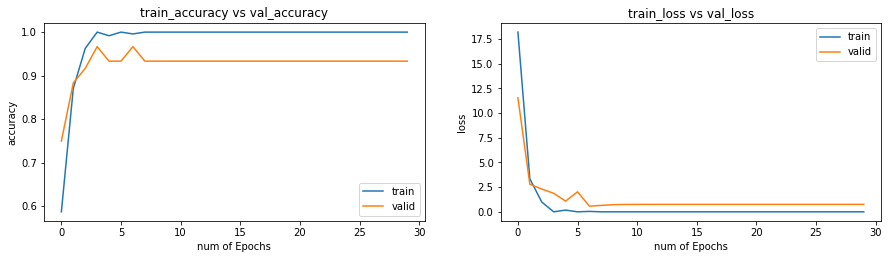

In [5]:

import matplotlib.pyplot as plt
%matplotlib inline 

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']


plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(train_acc)  
plt.plot(val_acc)  
plt.title('train_accuracy vs val_accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('num of Epochs')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(train_loss)  
plt.plot(val_loss)  
plt.title('train_loss vs val_loss')  
plt.ylabel('loss')  
plt.xlabel('num of Epochs')  
plt.legend(['train', 'valid']) 

plt.show()

### Test the Network

In [54]:
image_size = 224
# NOTE that flow_from_directory treats each sub-folder as a class which works fine for training data
# Actually class_mode=None is a kind of workaround for test data which too must be kept in a subfolder
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# batch_size can be 1 or any factor of test dataset size to ensure that test dataset is samples just once, i.e., no data is left out
test_generator = data_generator.flow_from_directory(
    directory = 'C:/Users/Sarala/Desktop/MypartWithData/Test',
    #directory = cv2.imread('C:/Users/Shashini Nimasha/Desktop/restnet/test/1.jpg'),
    target_size = (image_size, image_size),
    batch_size = 1,
    class_mode = None,
    shuffle = False,
    seed = 123
)

# Try batch size of 1+ in test_generator & check batch_index & filenames in resulting batches
'''
for i in test_generator:
    #print(test_generator.batch_index, test_generator.batch_size)
    idx = (test_generator.batch_index - 1) * test_generator.batch_size
    print(test_generator.filenames[idx : idx + test_generator.batch_size])
'''

Found 12 images belonging to 1 classes.


'\nfor i in test_generator:\n    #print(test_generator.batch_index, test_generator.batch_size)\n    idx = (test_generator.batch_index - 1) * test_generator.batch_size\n    print(test_generator.filenames[idx : idx + test_generator.batch_size])\n'

#### Test the .h5 file

In [7]:
#Load the .h5 model

model = load_model('vgg16_5.h5')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
# Reset before each call to predict

test_generator.reset()

pred = model.predict_generator(test_generator, steps = len(test_generator), verbose = 1)

predicted_class_indices = np.argmax(pred, axis = 1)

12/12 [==============================] - 5s 397ms/step


In [9]:
# validated the results

results_df = pd.DataFrame(
    {
        'id': pd.Series(test_generator.filenames), 
        'label': pd.Series(predicted_class_indices)
    })
results_df['id'] = results_df.id
results_df.sort_values(by='id', inplace = True)

#results_df.to_csv('submission.csv', index=False)
results_df

,id,label
0,validate\01__Mild_DR.jpg,1
1,validate\01__No_DR.jpg,0
2,validate\01__Other_DR.jpg,2
3,validate\02__Mild_DR.jpg,1
4,validate\02__No_DR.jpg,0
5,validate\02__Other_DR.jpg,2
6,validate\03__Mild_DR.jpg,1
7,validate\03__No_DR.jpg,0
8,validate\03__Other_DR.jpg,2
9,validate\04__Mild_DR.jpg,1


#### Test the .pkl file

In [51]:
from sklearn import model_selection
import pickle
import joblib

In [52]:
#save the pkl file

joblib_file = "Mild_VGG16.pkl"  
joblib.dump(custom_resnet_model, joblib_file)

['Mild_VGG16.pkl']

In [57]:
#load the .pkl file

loaded_model = joblib.load("Mild_VGG16.pkl")

In [59]:
# Reset before each call to predict

test_generator.reset()

pred = loaded_model.predict_generator(test_generator, steps = len(test_generator), verbose = 1)

predicted_class_indices = np.argmax(pred, axis = 1)

12/12 [==============================] - 7s 549ms/step


In [60]:
# validated the results

results_df = pd.DataFrame(
    {
        'id': pd.Series(test_generator.filenames), 
        'label': pd.Series(predicted_class_indices)
    })
results_df['id'] = results_df.id
results_df.sort_values(by='id', inplace = True)

#results_df.to_csv('submission.csv', index=False)
results_df

,id,label
0,validate\01__Mild_DR.jpg,1
1,validate\01__No_DR.jpg,0
2,validate\01__Other_DR.jpg,2
3,validate\02__Mild_DR.jpg,1
4,validate\02__No_DR.jpg,0
5,validate\02__Other_DR.jpg,2
6,validate\03__Mild_DR.jpg,1
7,validate\03__No_DR.jpg,0
8,validate\03__Other_DR.jpg,2
9,validate\04__Mild_DR.jpg,1
